# Classification

The Palmer Penguins dataset is a common resource for data exploration and demonstration of data analysis techniques. It was brought into the limelight by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, which is a member of the Long Term Ecological Research Network.

The dataset includes data for 344 penguins from three different species found on three islands in the Palmer Archipelago, Antarctica. The measured attributes in the dataset include:

1. **Species**: The species of the penguin, which can be Adelie, Gentoo, or Chinstrap.
2. **Island**: The island in the Palmer Archipelago, Antarctica, where the penguin observation was made. The options are Torgersen, Biscoe, or Dream.
3. **Culmen Length (mm)**: The length of the penguin's culmen (bill).
4. **Culmen Depth (mm)**: The depth of the penguin's culmen (bill).
5. **Flipper Length (mm)**: The length of the penguin's flipper.
6. **Body Mass (g)**: The body mass of the penguin.
7. **Sex**: The sex of the penguin.

The Palmer Penguins dataset is excellent for practicing data cleaning, exploration, and visualization.

You can find more information about the dataset, including a more detailed explanation of the variables, in this repository: [allisonhorst/palmerpenguins](https://github.com/allisonhorst/palmerpenguins).

For more in-depth studies or referencing, you might also consider checking out the publications from Palmer Station LTER: [pal.lternet.edu/bibliography](http://pal.lternet.edu/bibliography).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline

In [3]:
# read penquins dataset from github
penguins = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
# drop the year column, it is not useful for our analysis,
# and it has no adequate explanation in the dataset documentation
# Drop the 'year' column
penguins.drop(columns=['year'], inplace=True)

# Display the first few rows of the dataframe
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


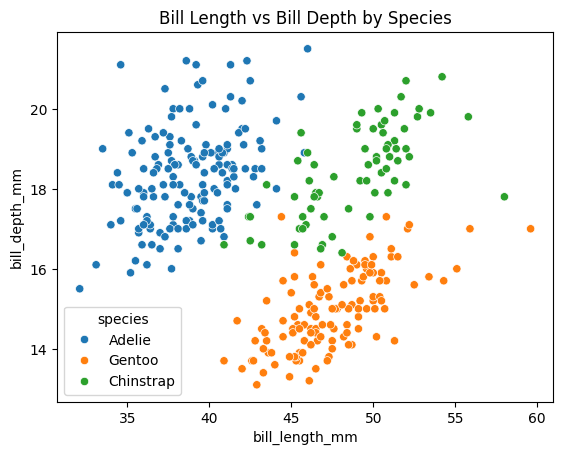

In [5]:
# Create a scatterplot of bill length vs bill depth using seaborn, hue by species.
# Add a title.
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

# Add title
plt.title('Bill Length vs Bill Depth by Species')

# Show plot
plt.show()

In [6]:
numeric_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',	'body_mass_g']
categorical_features = ['island', 'sex']

In [7]:

# create a pipeline to impute missing values with the mean and scale numeric features
numeric_pipeline = make_pipeline(
    (SimpleImputer(strategy='mean')),  # Impute missing values with mean
    (StandardScaler())  # Scale numeric features
)

# create a pipeline to impute missing values with the most frequent value and one-hot encode categorical features

categorical_pipeline = make_pipeline(
    (SimpleImputer(strategy="most_frequent")),  # Impute missing values with most frequent value
    (OneHotEncoder(handle_unknown='ignore')))  # One-hot encode categorical features)
# create a column transformer to apply the numeric and categorical pipelines to the correct features
# use remainder='passthrough' to keep the remaining features in the dataframe

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_features),  # Apply numeric pipeline to numeric features
    ('categorical', categorical_pipeline, categorical_features)  # Apply categorical pipeline to categorical features
], remainder='passthrough')

# fit_transform the preprocessor on the penguins dataset
prepared_pen = preprocessor.fit_transform(penguins)
# convert the result to a dataframe
# use the preprocessor's get_feature_names_out() method to get the column names
penguin_dataframe = pd.DataFrame(prepared_pen,columns=preprocessor.get_feature_names_out())
print(preprocessor.get_feature_names_out())
# display the first 5 rows of the preprocessed dataframe
penguin_dataframe.head()

['numeric__bill_length_mm' 'numeric__bill_depth_mm'
 'numeric__flipper_length_mm' 'numeric__body_mass_g'
 'categorical__island_Biscoe' 'categorical__island_Dream'
 'categorical__island_Torgersen' 'categorical__sex_female'
 'categorical__sex_male' 'remainder__species']


,numeric__bill_length_mm,numeric__bill_depth_mm,numeric__flipper_length_mm,numeric__body_mass_g,categorical__island_Biscoe,categorical__island_Dream,categorical__island_Torgersen,categorical__sex_female,categorical__sex_male,remainder__species
0,-0.887081,0.787743,-1.422488,-0.565789,0.0,0.0,1.0,0.0,1.0,Adelie
1,-0.813494,0.126556,-1.065352,-0.503168,0.0,0.0,1.0,1.0,0.0,Adelie
2,-0.66632,0.431719,-0.422507,-1.192003,0.0,0.0,1.0,1.0,0.0,Adelie
3,-0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Adelie
4,-1.328605,1.092905,-0.565361,-0.941517,0.0,0.0,1.0,1.0,0.0,Adelie


In [8]:
#print(transformed_df.columns)
# separate the features from the target
# call the features X and the target y

X= penguin_dataframe.drop('remainder__species', axis = 1)
y= penguin_dataframe['remainder__species'].copy()


In [9]:
# setup binary classification for Adelie vs. rest of species
# use the Adelie species as the positive class
# create a new target called y_adelie
# Create a new target variable y_adelie
y_adelie = (y == 'Adelie')

print("Distribution of y_adelie:")
print(y_adelie.value_counts())

Distribution of y_adelie:
False    192
True     152
Name: remainder__species, dtype: int64


In [10]:
# build an SGDClassifier model using X and y
# use random_state=42 for reproducibility
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X, y_adelie)

SGDClassifier(random_state=42)

In [11]:
# compute the accuracy using cross_val_score with cv=10
# compute accuracy using cross_val_score with cv=10
accuracy = cross_val_score(sgd_clf, X, y_adelie, cv=10, scoring="accuracy")

In [12]:
# compute the mean accuracy
np.mean(accuracy)

0.9942016806722689

In [13]:
# predict the target using cross_val_predict with cv=10
# call the result y_train_pred
y_train_pred = cross_val_predict(sgd_clf, X, y_adelie, cv = 10)

In [14]:
# compute the confusion matrix
confusionmatrix = confusion_matrix(y_adelie, y_train_pred) #not sure if we should have labels=[True, False] or not
confusionmatrix

array([[192,   0],
       [  2, 150]])

In [15]:
# compute the precision score using precision_score()
precision_score(y_adelie, y_train_pred)
#wouldnt run without an average part cause its multicalss

1.0

In [16]:
# compute the recall score using recall_score()
recall_score(y_adelie, y_train_pred)

0.9868421052631579

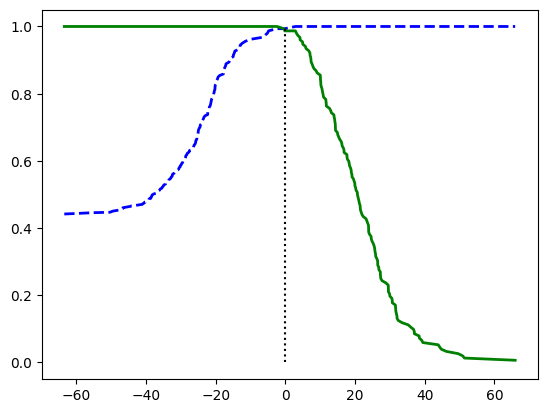

In [17]:
# draw the precision-recall curve
# call the result precisions, recalls, thresholds
threshold = 0 #same as class file 3?

scoresof_y  = cross_val_predict(sgd_clf,X,y_adelie,cv=10, method = 'decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_adelie,scoresof_y)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show() #same lines from class 3 file?


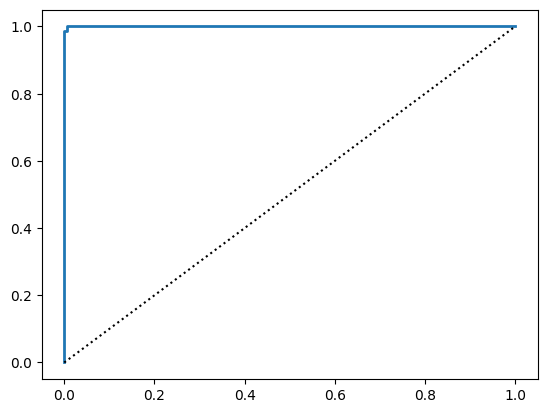

In [18]:
# call the result fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_adelie,scoresof_y) #from file 3
# plot the roc curve
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Penguin Random classifier's ROC curve")
plt.show()

In [19]:
# now let's do multiclass classification
# build an SGDClassifier model using X and y
# use random_state=42 for reproducibility #not sure if it should by just y or y_adeleie or not but just gonna use y because thats what it says
multiclass = SGDClassifier(random_state=42)
multiclass.fit(X,y)

SGDClassifier(random_state=42)

In [20]:
# show the mean accuracy using cross_val_score with cv=10

np.mean(cross_val_score(multiclass, X, y, cv=10))

0.9883193277310924

In [21]:
# predict the target using cross_val_predict with cv=10
# call the result y_train_pred
# show the confusion matrix

y_train_predictions = cross_val_predict(multiclass, X, y, cv = 10)
confusion_matrix(y,y_train_predictions)

array([[150,   2,   0],
       [  1,  67,   0],
       [  1,   0, 123]])

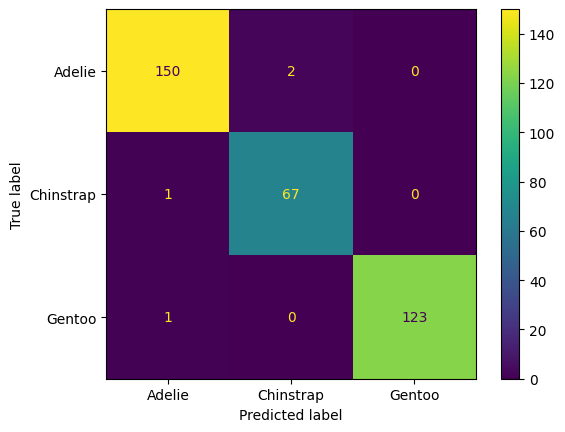

In [22]:
# use ConfusionMatrixDisplay to display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y,y_train_predictions)
plt.show()